In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score
from sklearn.preprocessing import MinMaxScaler
# from xgboost import XGBClassifier


In [5]:
#loading the dataset
df = pd.read_csv("churn.csv")
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.shape

(7043, 21)

In [8]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [13]:
# Converting TotalCharges from object to float64
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.info()
# Checking on NaN values after the type conversion
totalChargesNaN = df['TotalCharges'].isna().sum()
print('TotalCharges NaN values:', totalChargesNaN)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [15]:
# Drop the rows that contain NaN values as the count is only 11
df = df.dropna(subset=['TotalCharges'])
# Drop customerID column
df = df.drop(columns=['customerID'])
df['TotalCharges'].isna().sum()
df

KeyError: "['customerID'] not found in axis"

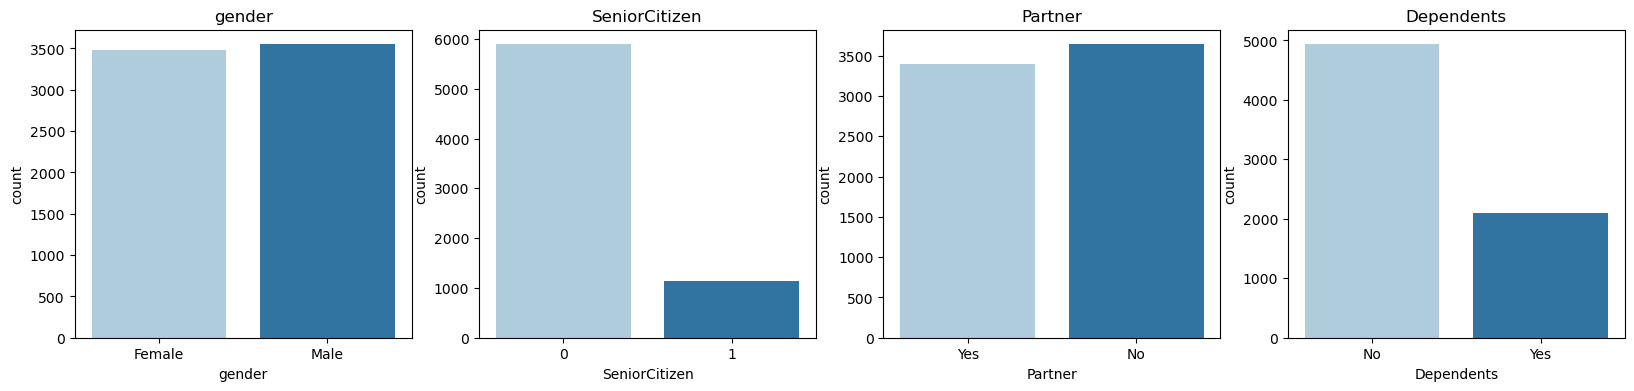

In [16]:
#some exploratory analyses
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

plt.figure(figsize=(20, 4))

for i, col in enumerate(cols):
    plt.subplot(1, len(cols), i+1)
    sns.countplot(x=col, data=df, palette=sns.color_palette("Paired"))
    plt.title(col)

<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

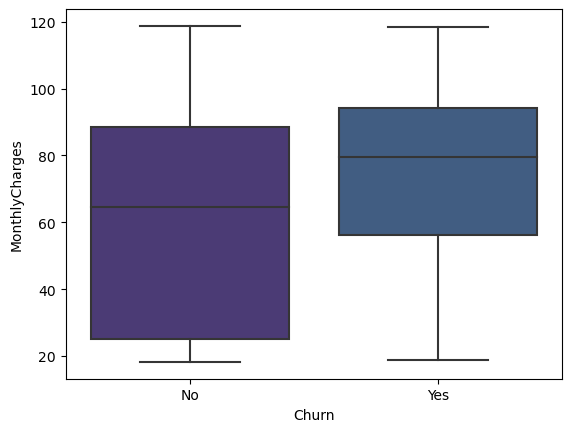

In [72]:
sns.set_palette("viridis")
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

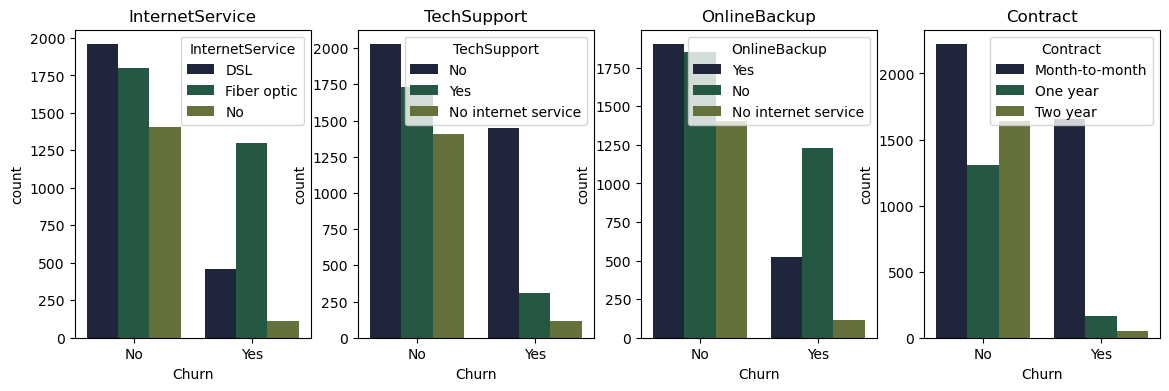

In [73]:
sns.set_palette("cubehelix")
cols = ['InternetService', 'TechSupport', 'OnlineBackup', 'Contract']

plt.figure(figsize=(14, 4))

for i, col in enumerate(cols):
    plt.subplot(1, len(cols), i+1)
    sns.countplot(x='Churn', hue=str(col), data=df)
    plt.title(col)

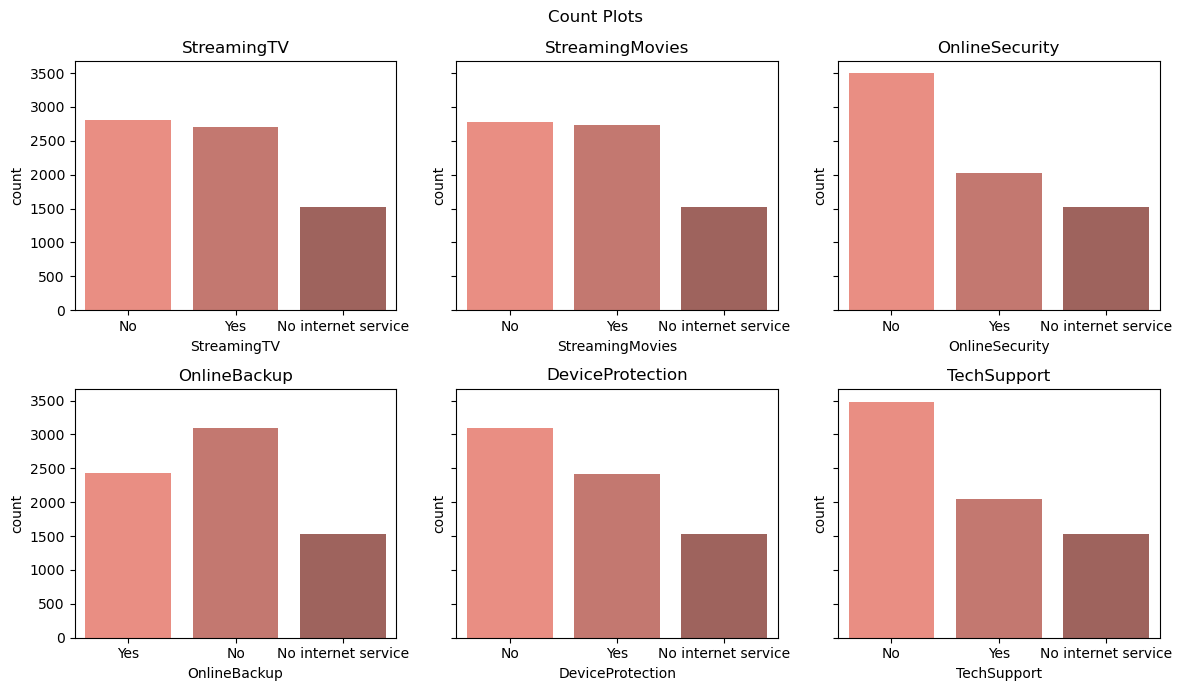

In [25]:
sns.set_palette("dark:salmon_r")
columns = ["StreamingTV", "StreamingMovies", "OnlineSecurity", "OnlineBackup", "DeviceProtection", "TechSupport"]

# Create a figure and an array of axes
fig, axes = plt.subplots(2, 3, figsize=(12, 7), sharey=True)

# Flatten the axes array to make it easier to iterate through
axes = axes.flatten()

for i, column in enumerate(columns):
    # Create a count plot for the current column
    sns.countplot(x=column, data=df, ax=axes[i])

    # Set title for the current subplot
    axes[i].set_title(column)

# Set a title for the entire figure (optional)
fig.suptitle("Count Plots")

# Adjust layout to prevent overlapping titles
plt.tight_layout()

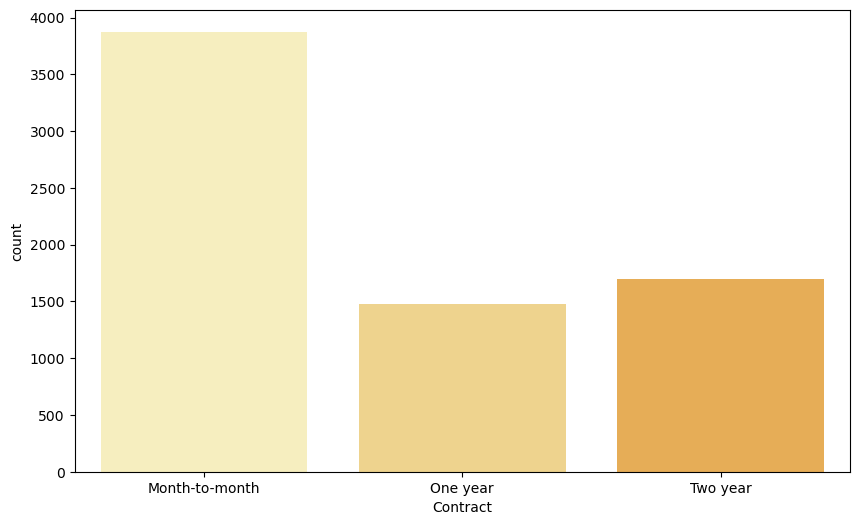

In [107]:
with sns.color_palette("YlOrBr"):
    plt.figure(figsize=(10,6))
    sns.countplot(x="Contract", data=df)


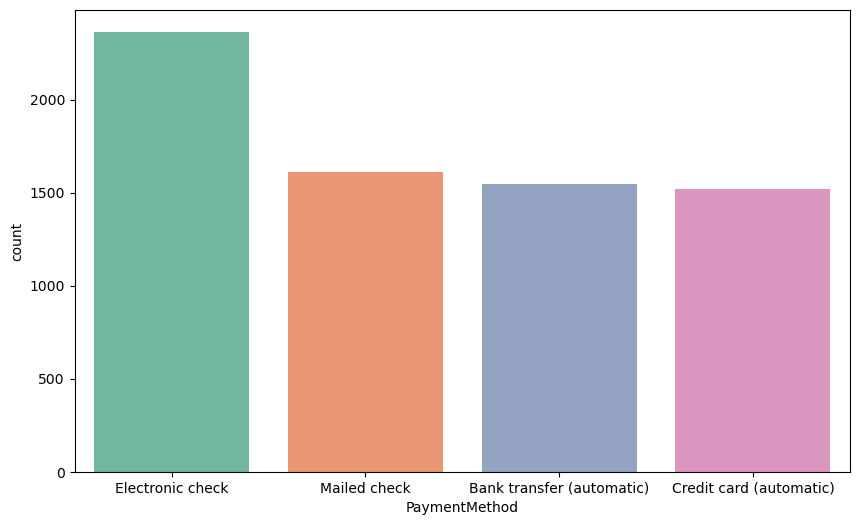

In [106]:
with sns.color_palette("Set2"):
    plt.figure(figsize=(10,6))
    sns.countplot(x="PaymentMethod", data=df)


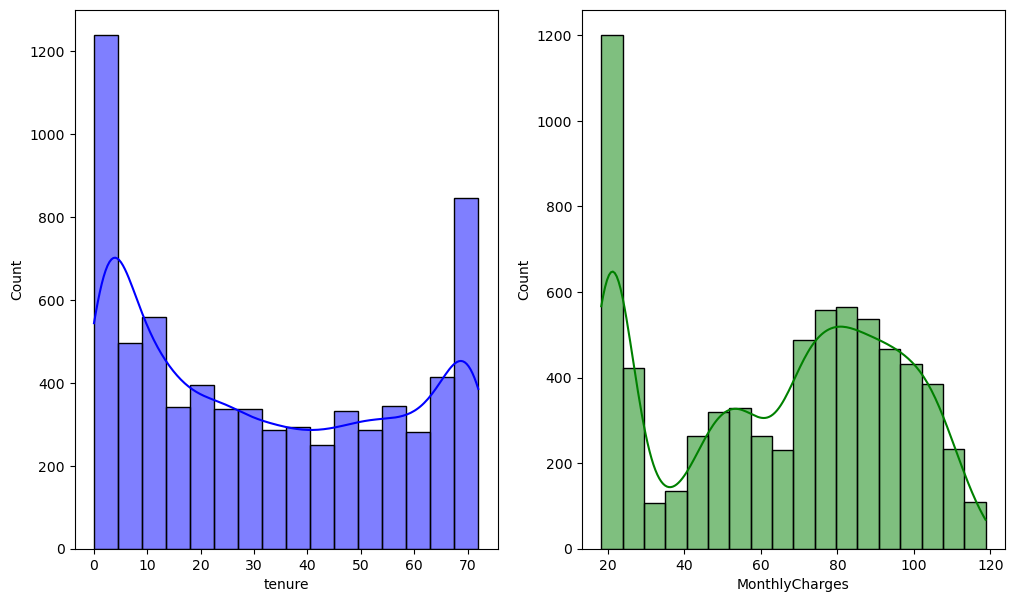

In [74]:
with sns.color_palette("husl"):
    fig, axes = plt.subplots(1,2, figsize=(12, 7))
    sns.histplot(df["tenure"], ax=axes[0], kde=True, color='blue')  
    sns.histplot(df["MonthlyCharges"], ax=axes[1], kde=True, color='green')  


In [75]:
churnnum = {'Yes':1, 'No':0}
df.Churn.replace(churnnum, inplace=True)
churnnum


{'Yes': 1, 'No': 0}

In [28]:
genderval = pd.pivot_table(df, values='Churn', index=['gender'], columns=['SeniorCitizen'], aggfunc=np.mean)
genderval


SeniorCitizen,0,1
gender,,
Female,0,0
Male,0,0


In [80]:
df.drop(['customerID','gender','PhoneService','Contract','TotalCharges'], axis=1, inplace=True)
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'Churn'],
      dtype='object')

In [81]:
# Resampling
nox = df[df.Churn == 0]
noy = df[df.Churn == 1]

yesupsampled = noy.sample(n=len(nox), replace=True, random_state=42)
print(len(yesupsampled))


5174


In [29]:
# Create an instance of MinMaxScaler
minmax = MinMaxScaler()

# Apply Min-Max scaling to 'tenure' and 'MonthlyCharges' columns
df[['tenure', 'MonthlyCharges']] = minmax.fit_transform(df[['tenure', 'MonthlyCharges']])

# Print the shape of the DataFrame
print(df.shape)

(7043, 21)


In [83]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
0,0,Yes,No,0.013889,No phone service,DSL,No,Yes,No,No,No,No,Yes,Electronic check,0.115423,0
1,0,No,No,0.472222,No,DSL,Yes,No,Yes,No,No,No,No,Mailed check,0.385075,0
2,0,No,No,0.027778,No,DSL,Yes,Yes,No,No,No,No,Yes,Mailed check,0.354229,1
3,0,No,No,0.625000,No phone service,DSL,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),0.239303,0
4,0,No,No,0.027778,No,Fiber optic,No,No,No,No,No,No,Yes,Electronic check,0.521891,1
